In [13]:
] activate "../../.."

  Activating project at `/sps/nemo/scratch/mpetro/Projects/PhD/SNSensitivityEstimate`


In [19]:
] add StatsBase

   Resolving package versions...
    Updating `/sps/nemo/scratch/mpetro/Projects/PhD/SNSensitivityEstimate/Project.toml`
  [2913bbd2] + StatsBase v0.34.5
  No Changes to `/sps/nemo/scratch/mpetro/Projects/PhD/SNSensitivityEstimate/Manifest.toml`


In [20]:
using CSV, DataFramesMeta, CairoMakie, StatsBase

In [32]:
t = Float64[]
signal = "bb0nu_foil_bulk"
processMode = "sumE"
dir = "informative_priors/Cimrman_J40_ND_cuts"

"informative_priors/Cimrman_J40_ND_cuts"

In [34]:
for f in readdir(dir)
    if (occursin(signal, f) && occursin(processMode, f))
        d = CSV.File(joinpath(dir, f)) |> DataFrame
        filter!(x -> x.thalf .> 0, d)
        append!(t, d.thalf)
    end
end

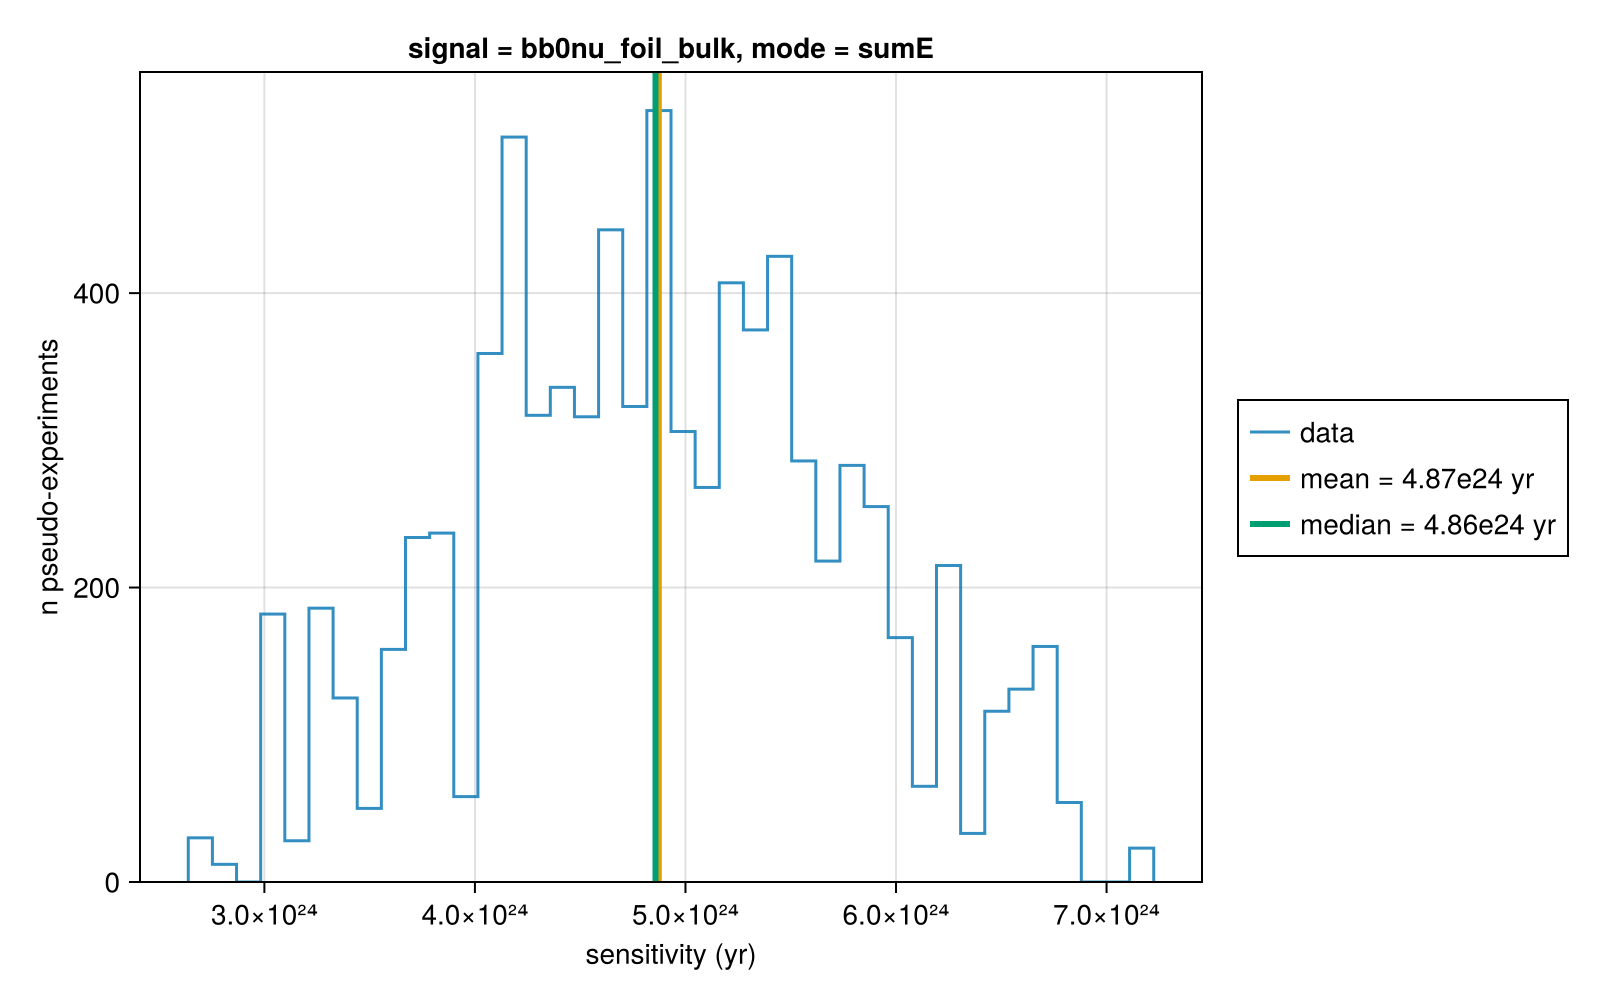

In [35]:
let
    f = Figure(size = (800, 500))
    a = Axis(
        f[1,1], xlabel = "sensitivity (yr)", 
        ylabel = ("n pseudo-experiments"), limits = (nothing, nothing, 0, nothing), 
        title = "signal = $signal, mode = $processMode"
    )
    p1 = stephist!(a,t, bins = 40, label = "data")
    p2 = vlines!(
        a, 
        [mean(t)], 
        color = Makie.wong_colors()[2],
        linewidth = 3
    )
    p3 = vlines!(
        a, 
        [median(t)], 
        color = Makie.wong_colors()[3],
        linewidth = 3
    )

    Legend(f[1,2], [p1, p2, p3], ["data", "mean = $(round(mean(t), sigdigits = 3)) yr", "median = $(round(median(t), sigdigits = 3)) yr"])
    save("result_$(signal)_$(processMode)_informative_ND_cuts_J40.png", f)
    f
end